In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Парная регрессия**

In [3]:
data = pd.read_csv("gen_regression.csv")

In [25]:
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


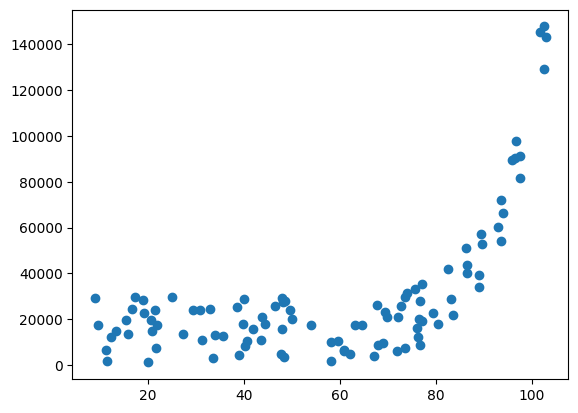

In [5]:
X = data.x
y = data.y
plt.scatter(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


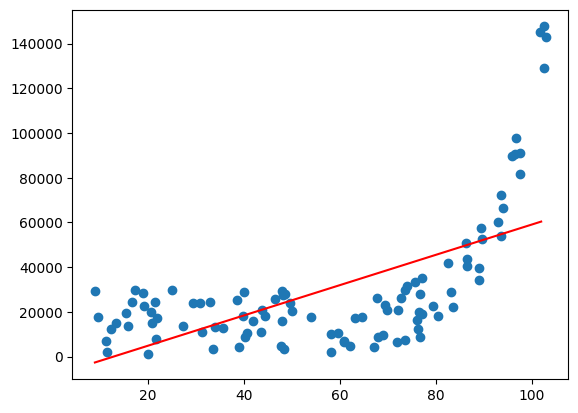

In [7]:
from sklearn.linear_model import LinearRegression

# Reshape X to a 2D array before fitting the model
X = data[['x']]  # Use double brackets to select the column as a DataFrame

linear = LinearRegression().fit(X, y)
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [8]:
linear.score(X, y)

0.37467360318911636

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


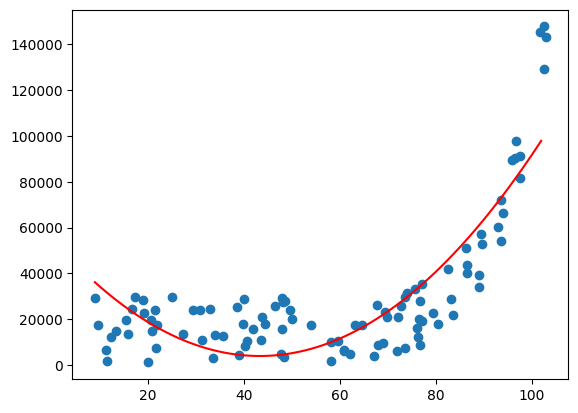

In [10]:
from sklearn.preprocessing import PolynomialFeatures
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
X_2.shape
X_2[:5]
poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

**Классификация**

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [12]:
y = data.y
X = data.drop(["y"], axis=1)

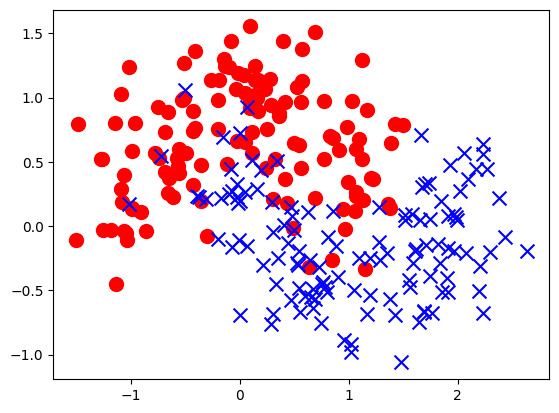

In [13]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

<ipython-input-14-c2fb8c9563cf>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-14-c2fb8c9563cf>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


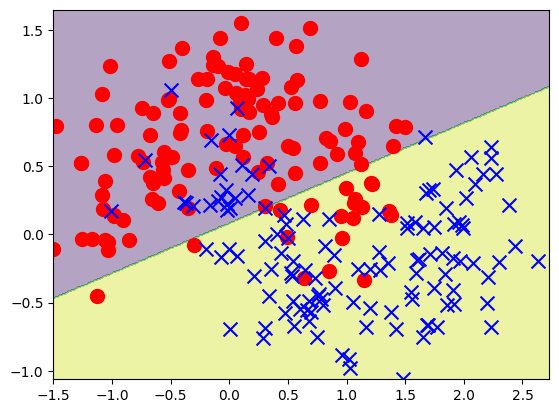

In [14]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [15]:
logistic.score(X, y)

0.832

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


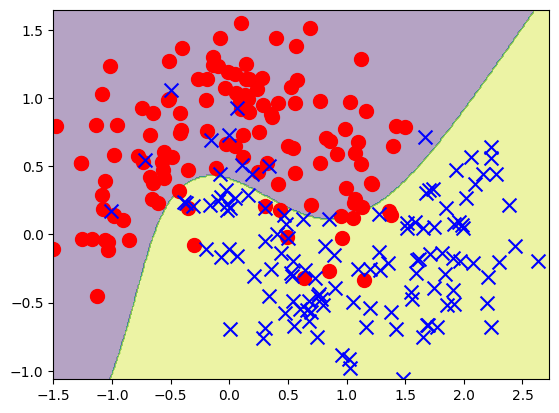

In [16]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
X_3.shape
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

**Регрессия на реальных данных**

In [17]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [18]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

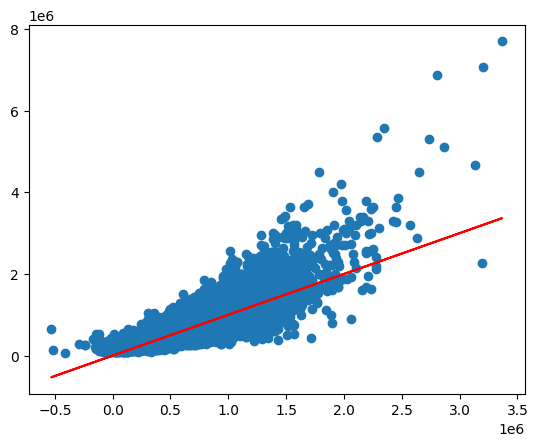

In [21]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [23]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
X_3_kc_prices.shape

(21613, 1330)

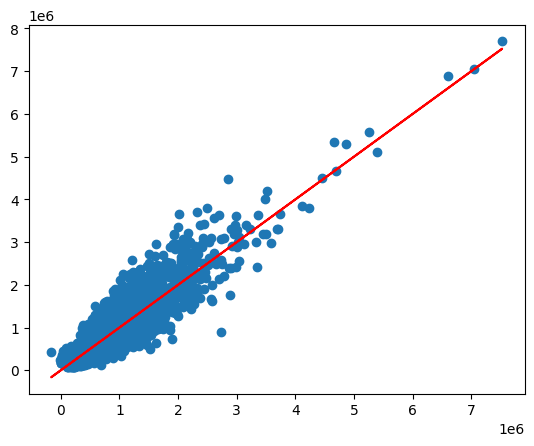

In [24]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

**задание 1.**В выполненной работе добавьте замер времени обучения каждой модели.

Время обучения линейной регрессии: 0.0056269168853759766 секунд
Время обучения полиномиальной регрессии (степень 2): 0.0053806304931640625 секунд


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


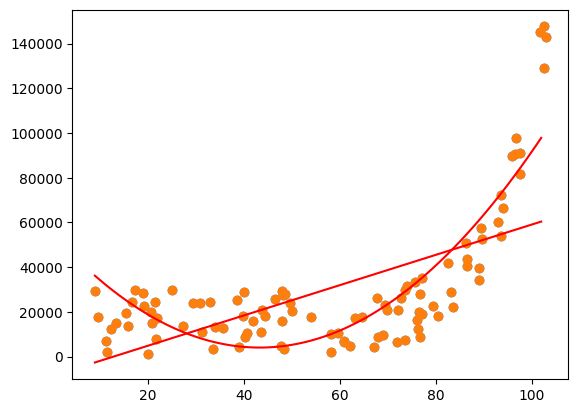

In [26]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#парная регрессия
data = pd.read_csv("gen_regression.csv")
X = data[['x']]  # Используем double brackets, чтобы выбрать колонку как DataFrame
y = data.y

# Замер времени для линейной регрессии
start_time = time.time()

linear = LinearRegression().fit(X, y)

end_time = time.time()
print(f"Время обучения линейной регрессии: {end_time - start_time} секунд")

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

# Построение графика
plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

# Замер времени для полиномиальной регрессии
start_time = time.time()

transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)

end_time = time.time()
print(f"Время обучения полиномиальной регрессии (степень 2): {end_time - start_time} секунд")

xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)

# Построение графика
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

Время обучения логистической регрессии: 0.005955219268798828 секунд
Время обучения логистической регрессии с полиномиальными признаками (степень 3): 0.0058443546295166016 секунд


<ipython-input-27-e9e99709204b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-27-e9e99709204b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names

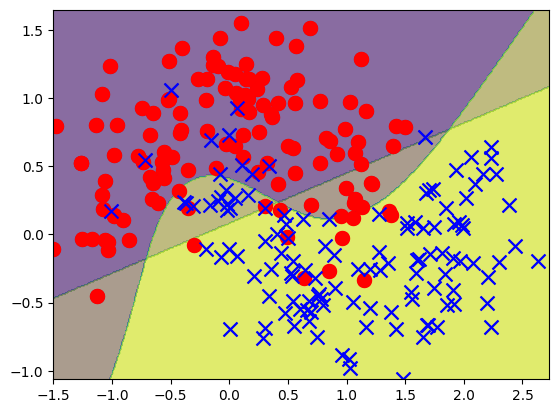

In [27]:
#Классификация
# Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

# Замер времени для логистической регрессии
start_time = time.time()

logistic = LogisticRegression().fit(X, y)

end_time = time.time()
print(f"Время обучения логистической регрессии: {end_time - start_time} секунд")

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

# Замер времени для полиномиальной трансформации
start_time = time.time()

class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
class_3 = LogisticRegression().fit(X_3, y)

end_time = time.time()
print(f"Время обучения логистической регрессии с полиномиальными признаками (степень 3): {end_time - start_time} секунд")

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)


Время обучения линейной регрессии: 0.01057291030883789 секунд
Время обучения полиномиальной регрессии (степень 3): 5.594757556915283 секунд


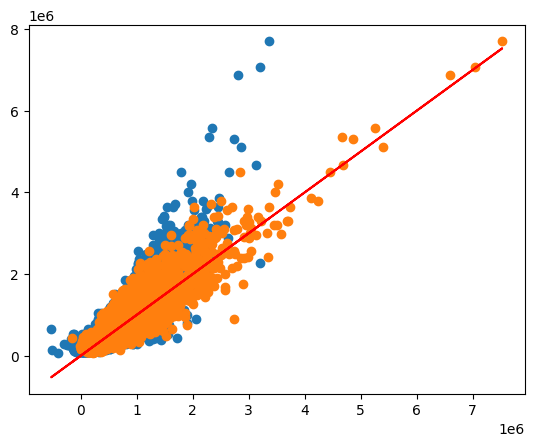

In [30]:
#Регрессия на реальных данных (kc house data):
# Загрузка данных
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Замер времени для линейной регрессии
start_time = time.time()

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

end_time = time.time()
print(f"Время обучения линейной регрессии: {end_time - start_time} секунд")

y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)

# Построение графика
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

# Замер времени для полиномиальной регрессии (степень 3)
start_time = time.time()

poly_features_kc_prices = PolynomialFeatures(degree=3)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

end_time = time.time()
print(f"Время обучения полиномиальной регрессии (степень 3): {end_time - start_time} секунд")

y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)

# Построение графика
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')


**Задание 2.**На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Время обучения модели порядка 5: 0.0049 секунд
Время обучения модели порядка 10: 0.0045 секунд
Время обучения модели порядка 100: 0.0542 секунд


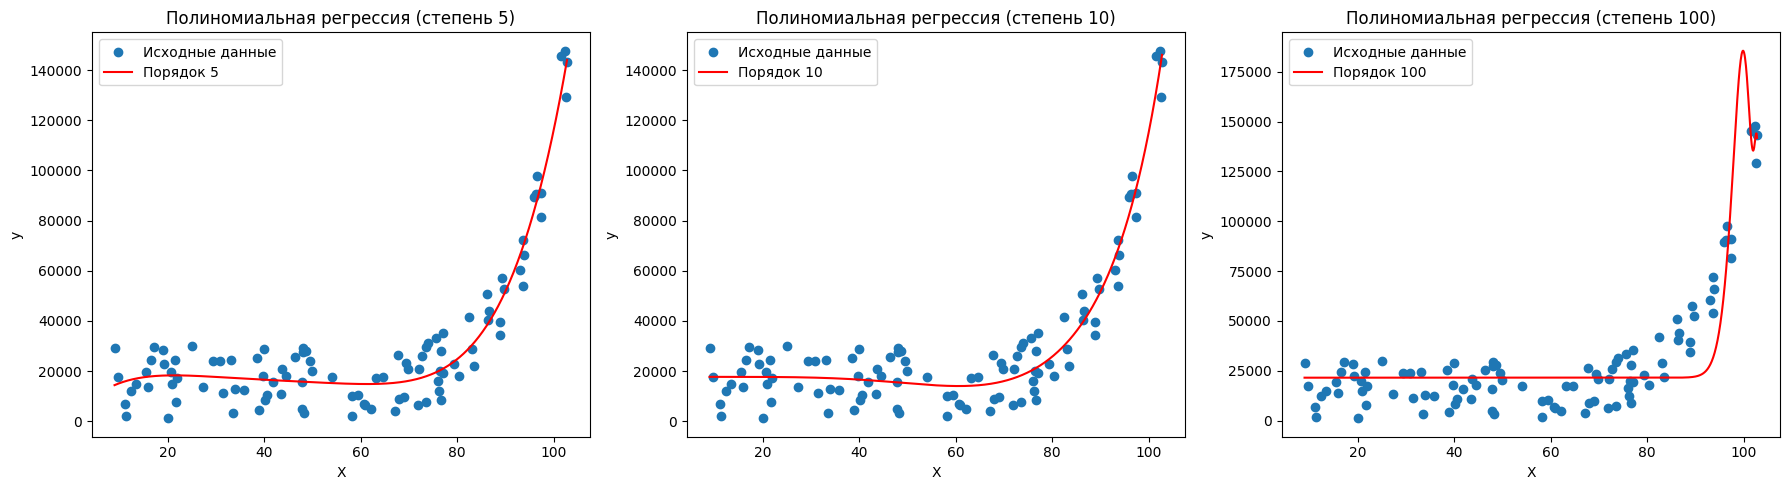

In [31]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных
data = pd.read_csv("gen_regression.csv")
X = data[['x']]  # Используем double brackets, чтобы выбрать колонку как DataFrame
y = data.y

# Функция для построения полиномиальной регрессии
def polynomial_regression(degree):
    # Замер времени для полиномиальной регрессии
    start_time = time.time()

    # Преобразуем данные в полиномиальные признаки
    transformation = PolynomialFeatures(degree=degree)
    X_transformed = transformation.fit_transform(X)

    # Обучаем модель
    model = LinearRegression().fit(X_transformed, y)

    # Замер времени
    end_time = time.time()
    training_time = end_time - start_time

    # Предсказания
    xx = np.arange(X.x.min(axis=0), X.x.max(axis=0), 0.1).reshape(-1, 1)
    xx_transformed = transformation.transform(xx)
    yy = model.predict(xx_transformed)

    # Возвращаем модель, время обучения и предсказания
    return model, training_time, xx, yy

# Модели для степеней 5, 10 и 100
degrees = [5, 10, 100]
models = []
training_times = []
predictions = []

for degree in degrees:
    model, training_time, xx, yy = polynomial_regression(degree)
    models.append(model)
    training_times.append(training_time)
    predictions.append((xx, yy))

# Сравнение времени обучения
for i, degree in enumerate(degrees):
    print(f"Время обучения модели порядка {degree}: {training_times[i]:.4f} секунд")

# Построение графиков
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X.x, y, label='Исходные данные')
    plt.plot(predictions[i][0], predictions[i][1], c='r', label=f'Порядок {degree}')
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


**Задание 3.**То же самое проделайте с датасетом для классификации и "King county".

<ipython-input-34-8d9b95b391c6>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-34-8d9b95b391c6>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
<ipython-input-34-8d9b95b391c6>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

Время обучения модели порядка 5: 0.0087 секунд
Время обучения модели порядка 10: 0.0198 секунд
Время обучения модели порядка 100: 0.1308 секунд


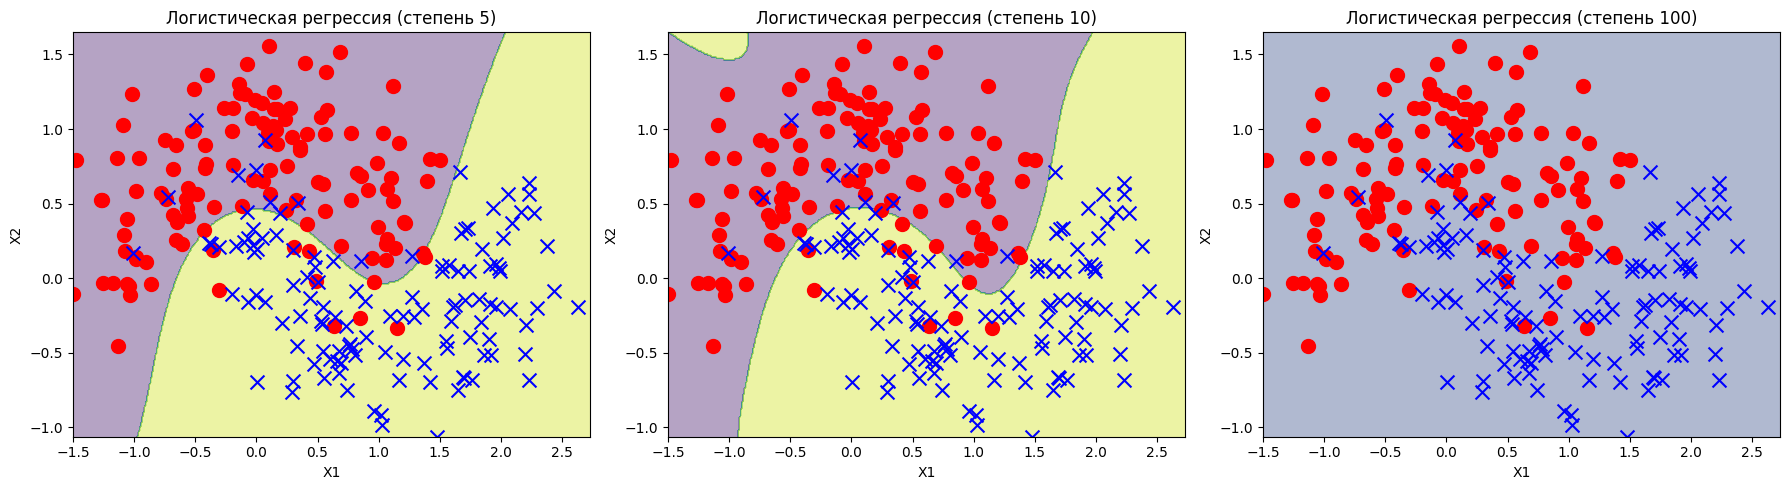

In [34]:
#Классификация
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для классификации
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

# Функция для классификации с полиномиальными признаками
def polynomial_classification(degree):
    # Замер времени для логистической регрессии
    start_time = time.time()

    # Преобразуем данные в полиномиальные признаки
    transformation = PolynomialFeatures(degree=degree, include_bias=False)
    X_transformed = transformation.fit_transform(X)

    # Обучаем модель
    model = LogisticRegression().fit(X_transformed, y)

    # Замер времени
    end_time = time.time()
    training_time = end_time - start_time

    # Предсказания
    xx, yy = np.meshgrid(
        np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
        np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
    XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

    # Transform XX before prediction
    XX_transformed = transformation.transform(XX)
    Z = model.predict(XX_transformed).reshape(xx.shape)

    # Возвращаем модель, время обучения и предсказания
    return model, training_time, xx, yy, Z

# Модели для степеней 5, 10 и 100
degrees = [5, 10, 100]
models = []
training_times = []
predictions = []

for degree in degrees:
    model, training_time, xx, yy, Z = polynomial_classification(degree)
    models.append(model)
    training_times.append(training_time)
    predictions.append((xx, yy, Z))

# Сравнение времени обучения
for i, degree in enumerate(degrees):
    print(f"Время обучения модели порядка {degree}: {training_times[i]:.4f} секунд")

# Построение графиков
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    plt.contourf(predictions[i][0], predictions[i][1], predictions[i][2], alpha=0.4)
    plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], marker="o", c='r', s=100)
    plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], marker="x", c='b', s=100)
    plt.title(f'Логистическая регрессия (степень {degree})')
    plt.xlabel('X1')
    plt.ylabel('X2')

plt.tight_layout()
plt.show()

**Задание 4.**Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

# Функция для полиномиальной регрессии
def polynomial_regression(degree, X, y, is_classification=False):
    start_time = time.time()

    # Преобразуем данные в полиномиальные признаки
    transformation = PolynomialFeatures(degree=degree)
    X_transformed = transformation.fit_transform(X)

    if is_classification:
        # Логистическая регрессия для классификации
        model = LogisticRegression().fit(X_transformed, y)
        predictions = model.predict(X_transformed)
        accuracy = accuracy_score(y, predictions)
        return model, time.time() - start_time, accuracy
    else:
        # Линейная регрессия для регрессии
        model = LinearRegression().fit(X_transformed, y)
        r2_score = model.score(X_transformed, y)
        return model, time.time() - start_time, r2_score

# Задача 1: Полиномиальная регрессия
data_reg = pd.read_csv("gen_regression.csv")
X_reg = data_reg[['x']]
y_reg = data_reg.y

# Задача 2: Классификация
data_class = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y_class = data_class.y
X_class = data_class.drop(["y"], axis=1)

# Задача 3: Линейная регрессия на реальных данных (King County)
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Степени полиномов для анализа
degrees = [5, 10, 100]

# Результаты
results = []

# Задача 1 (Полиномиальная регрессия)
for degree in degrees:
    model, training_time, r2_score = polynomial_regression(degree, X_reg, y_reg)
    results.append({'Задача': 'Регрессия', 'Степень': degree, 'Время (с)': training_time, 'R²': r2_score})

# Задача 2 (Логистическая регрессия)
for degree in degrees:
    model, training_time, accuracy = polynomial_regression(degree, X_class, y_class, is_classification=True)
    results.append({'Задача': 'Классификация', 'Степень': degree, 'Время (с)': training_time, 'Точность': accuracy})

# Задача 3 (Линейная регрессия на реальных данных)
for degree in degrees:
    model, training_time, r2_score = polynomial_regression(degree, X_kc_prices, y_kc_prices)
    results.append({'Задача': 'Регрессия (King County)', 'Степень': degree, 'Время (с)': training_time, 'R²': r2_score})

# Создаем DataFrame для отображения результатов
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Задание 5.** Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загружаем данные
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Обучаем линейную регрессию
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# Получаем коэффициенты и соответствующие признаки
coefficients = reg_kc_multiple.coef_
features = X_kc_prices.columns

# Создаем DataFrame для отображения коэффициентов и признаков
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Сортируем по величине абсолютных коэффициентов
coeff_df['Abs Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='Abs Coefficient', ascending=False)

# Выводим отсортированные коэффициенты и признаки
print(coeff_df_sorted[['Feature', 'Coefficient']])


          Feature    Coefficient
14            lat  602748.226449
5      waterfront  582960.458423
15           long -214729.828253
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
0        bedrooms  -35766.541444
7       condition   26385.649139
4          floors    6689.550115
11       yr_built   -2620.223211
13        zipcode    -582.419866
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
17     sqft_lot15      -0.382642
3        sqft_lot       0.128598


**Задание 6.**Попробуйте также проинтерпретировать полиномиальную модель.

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Преобразуем данные в полиномиальные признаки (например, степень 3)
poly_features_kc_prices = PolynomialFeatures(degree=3)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

# Обучаем линейную регрессию на полиномиальных признаках
reg_poly_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

# Получаем коэффициенты и соответствующие признаки
coefficients_poly = reg_poly_kc.coef_
features_poly = poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns)

# Создаем DataFrame для отображения коэффициентов и признаков
coeff_df_poly = pd.DataFrame({
    'Feature': features_poly,
    'Coefficient': coefficients_poly
})

# Сортируем по величине абсолютных коэффициентов
coeff_df_poly['Abs Coefficient'] = coeff_df_poly['Coefficient'].abs()
coeff_df_poly_sorted = coeff_df_poly.sort_values(by='Abs Coefficient', ascending=False)

# Выводим отсортированные коэффициенты и признаки
print(coeff_df_poly_sorted[['Feature', 'Coefficient']])


                             Feature   Coefficient
527               sqft_living^2 long -5.746248e-02
611      sqft_living sqft_above long -4.669056e-02
1261           yr_built zipcode long  4.242198e-02
1171               sqft_above^2 long -3.865816e-02
645   sqft_living long sqft_living15 -3.531451e-02
...                              ...           ...
657         sqft_lot^2 sqft_basement -7.046170e-12
1329                    sqft_lot15^3 -6.035460e-12
99                      waterfront^2  1.783217e-12
875                     waterfront^3  1.776249e-12
650                       sqft_lot^3 -5.910825e-13

[1330 rows x 2 columns]
